In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

C:\Users\shahabuddin akhon hr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data = pd.read_csv('hr_dashboard_data.csv')
data.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [5]:
dataSet=data.drop(["Name"],axis=1)
dataSet.head()

,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [73]:
dataSet["Joining Date"].value_counts()

Jan-18    23
Jan-21    21
Jan-19    20
Jan-20    19
Jan-22    12
Jan-13    10
Jan-05    10
Jan-07     9
Jan-17     8
Jan-16     7
Jan-04     6
Jan-03     6
Jan-06     6
Jan-10     6
Jan-09     6
Jan-11     5
Jan-08     5
Jan-14     5
Jan-99     4
Jan-15     3
Jan-12     3
Jan-01     2
Jan-00     2
Jan-98     1
Jan-02     1
Name: Joining Date, dtype: int64

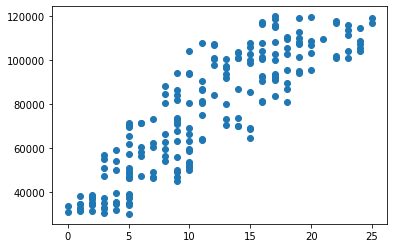

In [74]:
plt.scatter(data['Projects Completed'], data['Salary'])

In [75]:
gender=pd.get_dummies(dataSet["Gender"])
gender

,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
195,1,0
196,0,1
197,0,1
198,1,0


In [77]:
merged=pd.concat([dataSet,gender],axis=1)
merged.drop(["Gender"],axis=1,inplace=True)
merged

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Female,Male
0,25,11,57,25,4.7,Marketing,Analyst,Jan-20,63596,0,1
1,59,19,55,76,2.8,IT,Manager,Jan-99,112540,1,0
2,30,8,87,10,2.4,IT,Analyst,Jan-17,66292,0,1
3,26,1,53,4,1.4,Marketing,Intern,Jan-22,38303,1,0
4,43,14,3,9,4.5,IT,Team Lead,Jan-05,101133,0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,29,9,32,87,3.5,HR,Junior Developer,Jan-19,50051,1,0
196,26,7,45,28,2.8,IT,Junior Developer,Jan-21,46612,0,1
197,22,3,36,77,1.6,Finance,Intern,Jan-21,32992,0,1
198,36,23,96,50,3.4,Marketing,Manager,Jan-05,104216,1,0


In [78]:
merged.drop(['Female'],axis=1,inplace=True)

In [79]:
merged.rename(columns={'Male': 'Gender'}, inplace=True)

In [80]:
merged

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Gender
0,25,11,57,25,4.7,Marketing,Analyst,Jan-20,63596,1
1,59,19,55,76,2.8,IT,Manager,Jan-99,112540,0
2,30,8,87,10,2.4,IT,Analyst,Jan-17,66292,1
3,26,1,53,4,1.4,Marketing,Intern,Jan-22,38303,0
4,43,14,3,9,4.5,IT,Team Lead,Jan-05,101133,1
...,...,...,...,...,...,...,...,...,...,...
195,29,9,32,87,3.5,HR,Junior Developer,Jan-19,50051,0
196,26,7,45,28,2.8,IT,Junior Developer,Jan-21,46612,1
197,22,3,36,77,1.6,Finance,Intern,Jan-21,32992,1
198,36,23,96,50,3.4,Marketing,Manager,Jan-05,104216,0


In [81]:
le=LabelEncoder()
merged['Joining Date'] = le.fit_transform(merged['Joining Date'])

In [87]:
merged

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Gender
0,25,11,57,25,4.7,Marketing,Analyst,20,63596,1
1,59,19,55,76,2.8,IT,Manager,24,112540,0
2,30,8,87,10,2.4,IT,Analyst,17,66292,1
3,26,1,53,4,1.4,Marketing,Intern,22,38303,0
4,43,14,3,9,4.5,IT,Team Lead,5,101133,1
...,...,...,...,...,...,...,...,...,...,...
195,29,9,32,87,3.5,HR,Junior Developer,19,50051,0
196,26,7,45,28,2.8,IT,Junior Developer,21,46612,1
197,22,3,36,77,1.6,Finance,Intern,21,32992,1
198,36,23,96,50,3.4,Marketing,Manager,5,104216,0


In [89]:
department_map = {
    "Marketing": 1,
    "Sales": 2,
    "Finance": 3,
    "HR":4,
    "IT":5
}
merged["Department"] = merged["Department"].replace(department_map)

In [92]:
Position_map = {
    "Intern": 1,
    "Junior Developer": 2,
    "Senior Developer": 3,
    "Analyst": 4,
    "Manager":5,
    "Team Lead":6
}
merged["Position"] = merged["Position"].replace(Position_map)

In [93]:
merged

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Gender
0,25,11,57,25,4.7,1,4,20,63596,1
1,59,19,55,76,2.8,5,5,24,112540,0
2,30,8,87,10,2.4,5,4,17,66292,1
3,26,1,53,4,1.4,1,1,22,38303,0
4,43,14,3,9,4.5,5,6,5,101133,1
...,...,...,...,...,...,...,...,...,...,...
195,29,9,32,87,3.5,4,2,19,50051,0
196,26,7,45,28,2.8,5,2,21,46612,1
197,22,3,36,77,1.6,3,1,21,32992,1
198,36,23,96,50,3.4,1,5,5,104216,0


In [95]:
y = merged["Salary"]
x = merged.drop("Salary",axis=1)
x

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Gender
0,25,11,57,25,4.7,1,4,20,1
1,59,19,55,76,2.8,5,5,24,0
2,30,8,87,10,2.4,5,4,17,1
3,26,1,53,4,1.4,1,1,22,0
4,43,14,3,9,4.5,5,6,5,1
...,...,...,...,...,...,...,...,...,...
195,29,9,32,87,3.5,4,2,19,0
196,26,7,45,28,2.8,5,2,21,1
197,22,3,36,77,1.6,3,1,21,1
198,36,23,96,50,3.4,1,5,5,0


In [137]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [138]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [139]:
y_pred = model.predict(X_test)
y_pred

array([ 96759.22437916,  93545.91463318,  50089.18064707,  73820.66589126,
        39424.00462829,  72500.60063382,  35448.79670152,  55884.63554366,
        94190.90164733,  36232.61570118,  64692.35430379, 115687.53775593,
       103818.104552  ,  71952.78229304,  41107.35093266,  34868.21294859,
        63782.47602978,  52768.67550752,  64754.49861605, 108190.92133375,
       104056.93467555,  70565.46192918, 101789.61400417, 118858.08002627,
        39844.55088307,  42559.57391325,  70068.84430774, 114157.10353996,
       103785.07318205,  88786.74259051, 110724.32121705, 101980.81710254,
        48903.50445137, 112347.26095437,  64510.43840762, 108130.22470147,
       114159.48964179,  97639.76490396,  35683.73378834,  58195.88841081])

In [140]:
y_test

199    104341
87      93702
74      46707
115     94290
7       39670
35      71558
3       38303
127     53400
193    107814
90      32903
139     69725
158    117951
141    110621
94      63299
50      33105
131     31456
180     71604
29      47188
43      61891
9       92915
144    107898
105     93569
64     100865
78     119208
33      30509
120     30231
168     72877
58      95289
16     105893
61     100719
133    116473
159    109418
21      50233
119    102771
44      65633
54     101100
178    116039
17      92074
122     31878
20      52122
Name: Salary, dtype: int64

In [141]:
model.score(X_test,y_test)

0.9198194557356034

In [122]:
X_test

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Gender
143,35,15,59,10,2.4,1,4,20,1
6,33,13,41,39,2.3,2,4,18,0
49,40,16,3,71,2.3,4,3,18,0
128,33,15,19,54,3.8,3,4,16,1
109,25,4,48,49,3.4,2,2,18,0
7,23,4,92,68,2.8,4,1,21,0
182,28,18,34,5,2.3,2,3,15,0
74,26,5,30,3,1.5,4,2,19,0
53,44,16,60,80,3.2,4,3,7,1
112,30,9,53,53,1.4,3,4,19,1


In [145]:
obj = [{
    "Age": 35,
    "Projects Completed": 20,
    "Productivity (%)":10,
    "Satisfaction Rate (%)": 50,
    "Feedback Score": 2.1,
    "Department": 4,
    "Position": 1,
    "Joining Date": 2,
    "Gender": 1,
}]

model.predict(pd.DataFrame(obj))

array([81624.77539496])

In [147]:
import pickle

In [150]:
pickle.dump(model, open('model.pkl', 'wb'))